In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
sns.set('talk')
sns.set_style("ticks")
sns.set_color_codes()
%matplotlib inline
import numpy as np
import seaborn as sns

In [102]:
data = pkl.load(open('data/output/BaseProblem/Multi_Zeta0.3_eval.pkl', "rb"))

In [103]:
data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']
data['Excess Load'] = data['Total Load']-5
data['Above'] = (data['Total Load'] >= 5)*(data['Total Load']-5)
data['Date'] = pd.date_range(start='2014-11-01',end='2014-12-31-23:00:00', periods=len(data))
data['Day'] = data['Date'].dt.day
data['Daily Excess'] = data.groupby('Day')['Above'].sum()

In [104]:
data['Daily Excess']

0           NaN
1      5.626045
2      6.687588
3      4.382331
4      4.249831
         ...   
740         NaN
741         NaN
742         NaN
743         NaN
744         NaN
Name: Daily Excess, Length: 745, dtype: float64

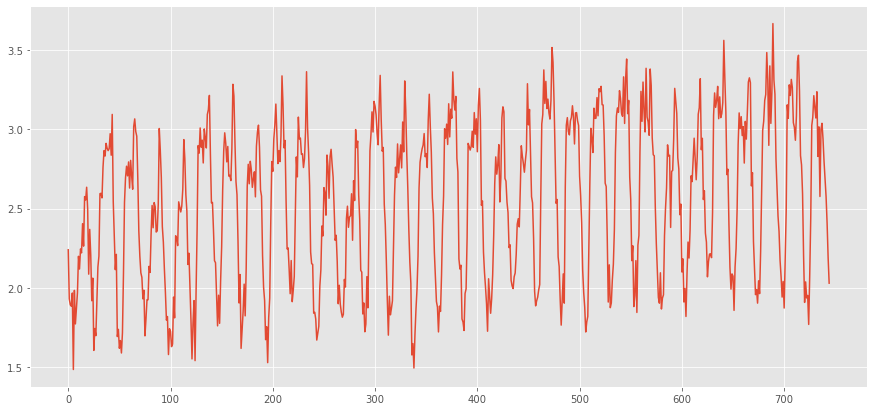

In [25]:
f, ax = plt.subplots(figsize=(15,7))
data['Base Loads'].plot()

In [105]:
data['above'] = (data['Total Load'] >= 5)*(data['Total Load']-5)

In [106]:
sum(data['above'])

324.1563660206969

In [107]:
data['above'].mean()

0.43510921613516323

In [108]:
data['Rewards'].sum()

-1192.1052988884499

In [109]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [110]:
data_base = pkl.load(open('data/output/BaseProblem/Multi_Zeta0.3base_eval.pkl', "rb"))

In [111]:
data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data_base['Base Loads 2']
data_base['Above'] = (data_base['Total Load'] >= 5)*(data_base['Total Load']-5)
data_base['Excess Load'] = data_base['Total Load']-5
data_base['Date'] = pd.date_range(start='2014-11-01',end='2014-12-31-23:00:00', periods=len(data))
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()

In [112]:
one_week = data.iloc[:,:]

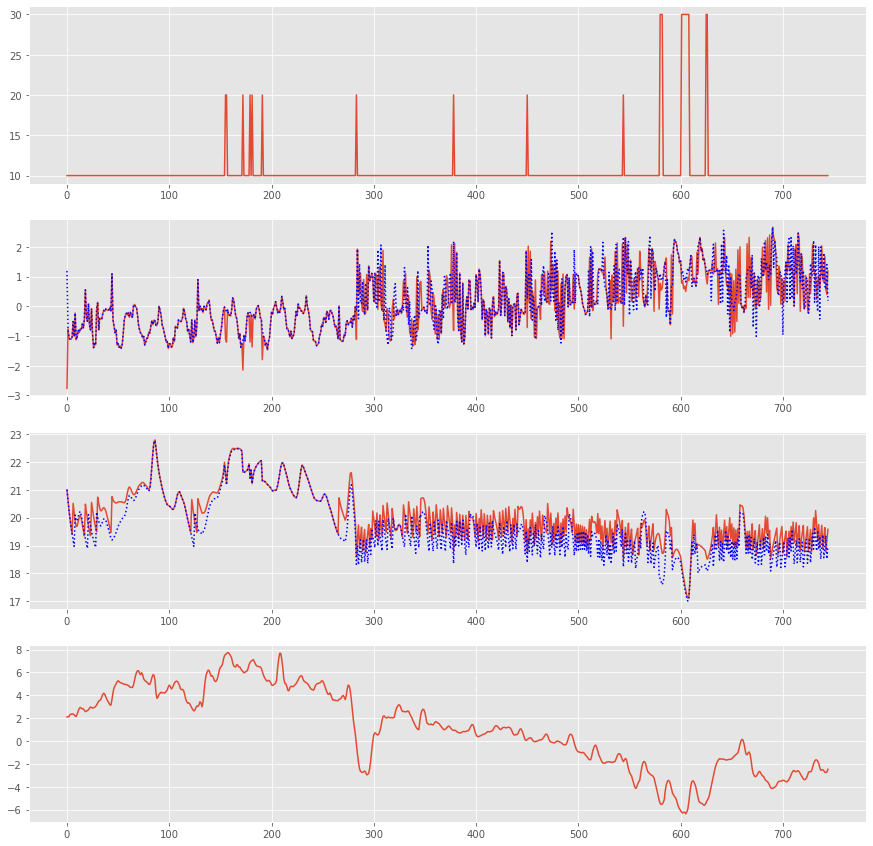

In [113]:
f, ax = plt.subplots(4,1,figsize=(15,15))
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Excess Load'].plot(ax=ax[1])
one_week['Double Base'] = one_week['Base Loads']*2
#one_week['Base Loads'].plot(ax=ax[1],c='g')
data_base.iloc[:,:]['Excess Load'].plot(ax=ax[1],c='b', linestyle = 'dotted')
one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2], c='b', linestyle = 'dotted')
one_week['Ambient Temperatures'].plot(ax=ax[3])

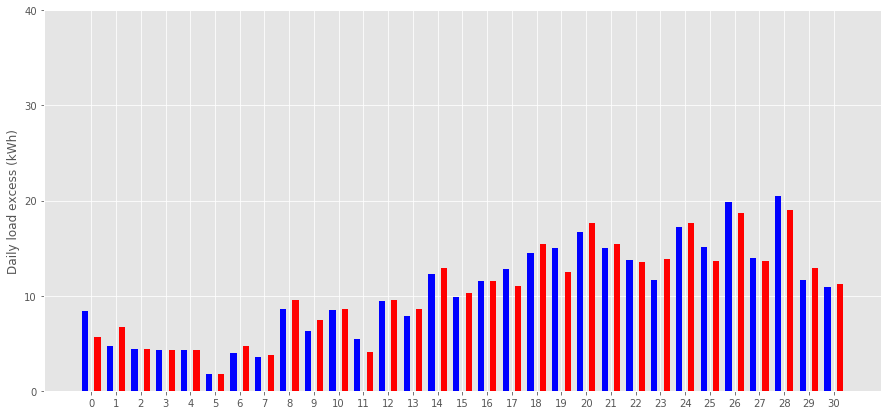

In [114]:
N=len(data_base.dropna())
ind = np.arange(N)
f, axs = plt.subplots(1,figsize=(15,7), sharey=False)
axs.bar(ind - 0.25, data_base['Daily Excess'].dropna(), color = 'b', width = 0.25, label = 'Base with static price')
axs.bar(ind + 0.25, data['Daily Excess'].dropna(), color = 'r', width = 0.25, label = 'Dynamic prices with RL')
axs.set_ylabel('Daily load excess (kWh)')
axs.set_yticks(np.arange(0, 50, 10))
#for i, v in enumerate(cost_labels_values):
#    axs[0].text(i-0.15, 
#              v+0.2, 
#              v, 
#              fontsize=12)
axs.set_xticks(ind)
#axs.set_xticklabels(labels)

In [36]:
sum(data['Total Load'] >= 5)

347

In [37]:
data_base['Rewards'].sum()

-2658.699720810283

In [38]:
sum(data_base['Above'])

495.4429260533392

In [28]:
data_base['above'].mean()

1.545624445117325

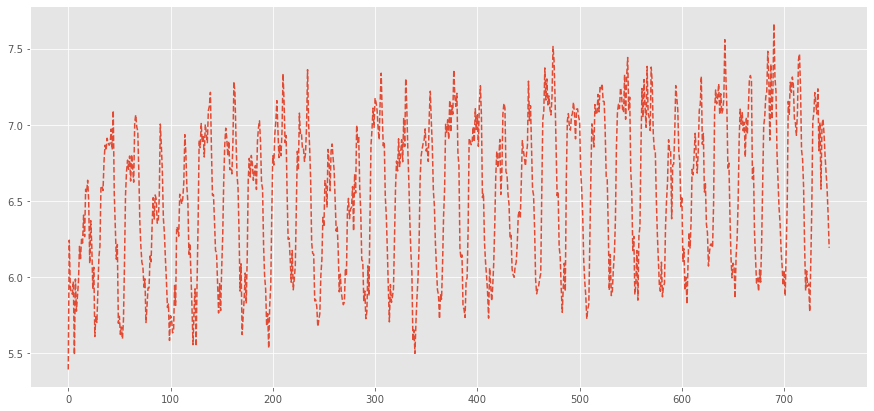

In [29]:
f, ax = plt.subplots(figsize=(15,7))
data_base['Total Load'].plot(ax=ax, linestyle='--')

In [30]:
sum(data_base['Total Load'] >= 5)

745

In [115]:
data = pkl.load(open('data/output/RLBuildings/Lowerload/9792641_dynamic_True_rewards_dqn.pkl', "rb"))

In [116]:
data[-1]

{'NUM_EPISODES': 1500,
 'EPSILON': 1,
 'EPS_DECAY': 0.99997,
 'LEARNING_RATE_': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 10,
 'LOAD_PENALTY': 1000,
 'PRICE_SENSITIVITY': 200,
 'ZETA': 0}

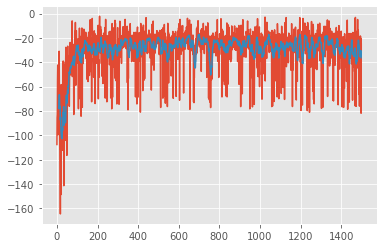

In [117]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

In [18]:
data_rms = pkl.load(open('data/output/8667145_dynamic_True_rewards_dqn.pkl', "rb"))

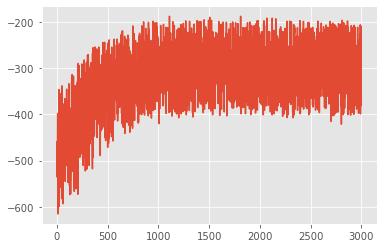

In [19]:
plt.figure()
plt.plot(data_rms[:-1])

# Buildings with RL agents

In [43]:
data = pkl.load(open('data/output/RLBuildings/Lowerload/9798623_dynamic_True_rewards_dqn.pkl', "rb"))

In [44]:
data[-1]

{'NUM_EPISODES': 1500,
 'EPSILON': 1,
 'EPS_DECAY': 0.99997,
 'LEARNING_RATE_': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 10,
 'LOAD_PENALTY': 1000,
 'PRICE_SENSITIVITY': 200,
 'ZETA': 0.1}

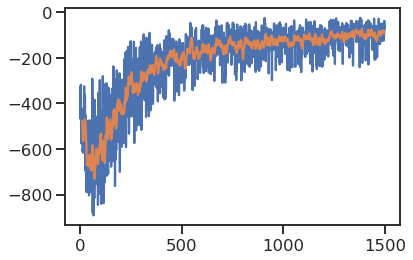

In [45]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

# Evaluation on January

In [2]:
data = pkl.load(open("data/output/RLBuildings/Lowerload/Multi_2_Buildings_Zeta0.1_eval.pkl", "rb"))

data['Total Load'] = data['Total Load']*1000
#data['Base Loads 1'] = data['Base Loads 1']*1000
#data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads']*1000
data['Deviation from load limit'] = data['Total Load'] - 4
data['Date'] = pd.date_range(start='2014-01-01',end='2014-01-31-23:00:00', periods=len(data))
data['Day'] = data['Date'].dt.day
data.index = data['Date']

In [3]:
data['Above'] = (data['Total Load'] >= 4)*(data['Total Load']-4)
sum(data['Above'])

869.7352362430715

In [4]:
data['Heating Load'] = data['Total Load'] - data['Base Loads']

In [5]:
data

,Inside Temperatures 1,Inside Temperatures 2,Base Loads,Actions 1,Actions 2,Ambient Temperatures,Actions,Rewards,Total Load,Total Price,Deviation from load limit,Date,Day,Above,Heating Load
Date,,,,,,,,,,,,,,,
2014-01-01 00:00:00,20.917023,21.048813,1.981808,0.380043,0.920782,2.118,0.0,-1.249695,4.583457,0.045835,0.583457,2014-01-01 00:00:00,1,0.583457,2.601649
2014-01-01 01:00:00,21.638201,20.326252,2.030423,0.476112,0.594353,2.118,0.0,-0.878390,4.171354,0.041714,0.171354,2014-01-01 01:00:00,1,0.171354,2.140931
2014-01-01 02:00:00,21.432899,19.927494,1.607406,0.514285,0.657964,2.147,0.0,-0.680666,3.951905,0.039519,-0.048095,2014-01-01 02:00:00,1,-0.000000,2.344499
2014-01-01 03:00:00,21.437859,19.687778,1.774156,0.543805,0.655248,2.324,0.0,-0.879208,4.172262,0.041723,0.172262,2014-01-01 03:00:00,1,0.172262,2.398105
2014-01-01 04:00:00,21.437733,19.550934,1.523183,0.533086,0.632003,2.344,1.0,-0.595731,3.853361,0.077067,-0.146639,2014-01-01 04:00:00,1,-0.000000,2.330177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31 19:00:00,20.156713,18.578234,2.959576,0.793051,0.859133,-2.514,4.0,-3.210636,6.263944,0.313197,2.263944,2014-01-31 19:00:00,31,2.263944,3.304369
2014-01-31 20:00:00,20.115205,18.524187,2.685651,0.807913,0.873418,-2.605,4.0,-3.069536,6.048313,0.302416,2.048313,2014-01-31 20:00:00,31,2.048313,3.362662
2014-01-31 21:00:00,20.092840,18.492292,2.736606,0.812679,0.877682,-2.735,4.0,-3.163891,6.117329,0.305866,2.117329,2014-01-31 21:00:00,31,2.117329,3.380723


In [6]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    #return x*50+10
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [7]:
data['Daily Excess'] = data.groupby('Day')['Above'].sum()

In [8]:
data['Above'].mean()

1.1689989734449884

In [9]:
data_base = pkl.load(open('data/output/RLBuildings/Lowerload/Multi_2_Buildings_Zeta0.130base_eval.pkl', "rb"))

In [10]:
data_base_10 = pkl.load(open('data/output/RLBuildings/Lowerload/Multi_2_Buildings_Zeta0.110_base_eval.pkl', "rb"))

In [11]:
data_base_tou = pkl.load(open('data/output/RLBuildings/Lowerload/Multi_2_Buildings_Zeta0.1_ToU_base_eval.pkl', "rb"))

In [12]:
data_base

,Inside Temperatures 1,Inside Temperatures 2,Base Loads,Actions 1,Actions 2,Ambient Temperatures,Rewards,Total Load,Total Price
0,20.917022,21.048814,0.001982,0.261409,0.674616,2.118,-0.600034,0.003854,0.115616
1,20.986432,20.012148,0.002030,0.429752,0.656171,2.118,-0.914649,0.004202,0.126068
2,21.004428,19.519250,0.001607,0.487205,0.662267,2.147,-0.647434,0.003906,0.117191
3,21.059959,19.244792,0.001774,0.519102,0.644979,2.324,-0.824393,0.004102,0.123070
4,21.067019,19.082668,0.001523,0.538984,0.644075,2.344,-0.632040,0.003889,0.116679
...,...,...,...,...,...,...,...,...,...
739,21.471148,19.629808,0.002960,0.866215,0.933026,-2.514,-3.041926,0.006558,0.196742
740,21.484814,19.653211,0.002686,0.882816,0.942970,-2.605,-2.842512,0.006337,0.190117
741,21.501763,19.695247,0.002737,0.876006,0.941072,-2.735,-2.872798,0.006371,0.191123
742,21.509017,19.713784,0.002319,0.863940,0.933760,-2.760,-2.460901,0.005915,0.177439


In [13]:

data_base['Total Load'] = data_base['Total Load']*1000
#data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
#data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads']*1000
data_base['Above'] = (data_base['Total Load'] >= 4)*(data_base['Total Load']-4)
data_base['Deviation from load limit'] = data_base['Total Load']-4
data_base['Date'] = pd.date_range(start='2014-01-01',end='2014-01-31-23:00:00', periods=len(data))
data_base.index = data_base['Date']
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()
data_base['Heating Load'] = data_base['Total Load'] - data_base['Base Loads']
data_base['Heating Load 2'] = (data_base['Actions 1'] + data_base['Actions 2'])*2

In [14]:
data_base_10['Total Load'] = data_base_10['Total Load']*1000
#data_base_10['Base Loads 1'] = data_base_10['Base Loads 1']*1000
#data_base_10['Base Loads 2'] = data_base_10['Base Loads 2']*1000
data_base_10['Base Loads'] = data_base_10['Base Loads']*1000
data_base_10['Above'] = (data_base_10['Total Load'] >= 4)*(data_base_10['Total Load']-4)
data_base_10['Deviation from load limit'] = data_base_10['Total Load']-4
data_base_10['Date'] = pd.date_range(start='2014-01-01',end='2014-01-31-23:00:00', periods=len(data))
data_base_10.index = data_base_10['Date']
data_base_10['Day'] = data_base_10['Date'].dt.day
data_base_10['Heating Load'] = data_base_10['Total Load'] - data_base_10['Base Loads']
data_base_10['Heating Load 2'] = (data_base_10['Actions 1'] + data_base_10['Actions 2'])*2

In [15]:
data_base_10

,Inside Temperatures 1,Inside Temperatures 2,Base Loads,Actions 1,Actions 2,Ambient Temperatures,Rewards,Total Load,Total Price,Above,Deviation from load limit,Date,Day,Heating Load,Heating Load 2
Date,,,,,,,,,,,,,,,
2014-01-01 00:00:00,20.917022,21.048814,1.981808,0.380043,0.920782,2.118,-1.249695,4.583457,0.045835,0.583457,0.583457,2014-01-01 00:00:00,1,2.601649,2.601649
2014-01-01 01:00:00,21.638201,20.326252,2.030423,0.476112,0.594353,2.118,-0.878390,4.171354,0.041714,0.171354,0.171354,2014-01-01 01:00:00,1,2.140931,2.140931
2014-01-01 02:00:00,21.432899,19.927494,1.607406,0.514285,0.657964,2.147,-0.680666,3.951905,0.039519,-0.000000,-0.048095,2014-01-01 02:00:00,1,2.344499,2.344499
2014-01-01 03:00:00,21.437859,19.687778,1.774156,0.543805,0.655248,2.324,-0.879208,4.172262,0.041723,0.172262,0.172262,2014-01-01 03:00:00,1,2.398105,2.398105
2014-01-01 04:00:00,21.437733,19.550934,1.523183,0.561054,0.653146,2.344,-0.680378,3.951584,0.039516,-0.000000,-0.048416,2014-01-01 04:00:00,1,2.428401,2.428401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31 19:00:00,22.558462,19.915934,2.959576,0.865314,0.979177,-2.514,-3.168814,6.648559,0.066486,2.648559,2.648559,2014-01-31 19:00:00,31,3.688984,3.688984
2014-01-31 20:00:00,22.582265,19.911071,2.685651,0.874966,0.982350,-2.605,-2.968920,6.400283,0.064003,2.400283,2.400283,2014-01-31 20:00:00,31,3.714632,3.714632
2014-01-31 21:00:00,22.592069,19.911007,2.736606,0.876615,0.982250,-2.735,-3.027425,6.454336,0.064543,2.454336,2.454336,2014-01-31 21:00:00,31,3.717729,3.717729


In [16]:
data_base_tou['Total Load'] = data_base_tou['Total Load']*1000
#data_base_tou['Base Loads 1'] = data_base_tou['Base Loads 1']*1000
#data_base_tou['Base Loads 2'] = data_base_tou['Base Loads 2']*1000
data_base_tou['Base Loads'] = data_base_tou['Base Loads']*1000
data_base_tou['Above'] = (data_base_tou['Total Load'] >= 4)*(data_base_tou['Total Load']-4)
data_base_tou['Deviation from load limit'] = data_base_tou['Total Load']-4
data_base_tou['Date'] = pd.date_range(start='2014-01-01',end='2014-01-31-23:00:00', periods=len(data))
data_base_tou.index = data_base_tou['Date']
data_base_tou['Day'] = data_base_tou['Date'].dt.day
data_base_tou['Heating Load'] = data_base_tou['Total Load'] - data_base_tou['Base Loads']
data_base_tou['Heating Load 2'] = (data_base_tou['Actions 1'] + data_base_tou['Actions 2'])*2

In [17]:
data_base_tou

,Inside Temperatures 1,Inside Temperatures 2,Base Loads,Actions 1,Actions 2,Ambient Temperatures,Rewards,Total Load,Total Price,Prices,Above,Deviation from load limit,Date,Day,Heating Load,Heating Load 2
Date,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,20.917022,21.048814,1.981808,0.261409,0.674616,2.118,-0.600034,3.853859,0.115616,30,-0.000000,-0.146141,2014-01-01 00:00:00,1,1.872051,1.872051
2014-01-01 01:00:00,20.986432,20.012148,2.030423,0.429752,0.656171,2.118,-0.914649,4.202269,0.126068,30,0.202269,0.202269,2014-01-01 01:00:00,1,2.171846,2.171846
2014-01-01 02:00:00,21.004428,19.519250,1.607406,0.487205,0.662267,2.147,-0.647434,3.906350,0.117191,30,-0.000000,-0.093650,2014-01-01 02:00:00,1,2.298944,2.298944
2014-01-01 03:00:00,21.059959,19.244792,1.774156,0.519102,0.644979,2.324,-0.824393,4.102317,0.123070,30,0.102317,0.102317,2014-01-01 03:00:00,1,2.328161,2.328161
2014-01-01 04:00:00,21.067019,19.082668,1.523183,0.538984,0.644075,2.344,-0.632040,3.889303,0.116679,30,-0.000000,-0.110697,2014-01-01 04:00:00,1,2.366119,2.366119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31 19:00:00,20.390814,18.718717,2.959576,0.879110,0.980564,-2.514,-3.439030,6.678923,0.267157,40,2.678923,2.678923,2014-01-31 19:00:00,31,3.719348,3.719348
2014-01-31 20:00:00,20.615858,18.855898,2.685651,0.871517,0.948581,-2.605,-2.982667,6.325846,0.253034,40,2.325846,2.325846,2014-01-31 20:00:00,31,3.640195,3.640195
2014-01-31 21:00:00,20.725423,18.944040,2.736606,0.861899,0.930084,-2.735,-2.889758,6.320574,0.252823,40,2.320574,2.320574,2014-01-31 21:00:00,31,3.583967,3.583967


In [308]:
one_week = data.iloc[17*24:24*24,:]

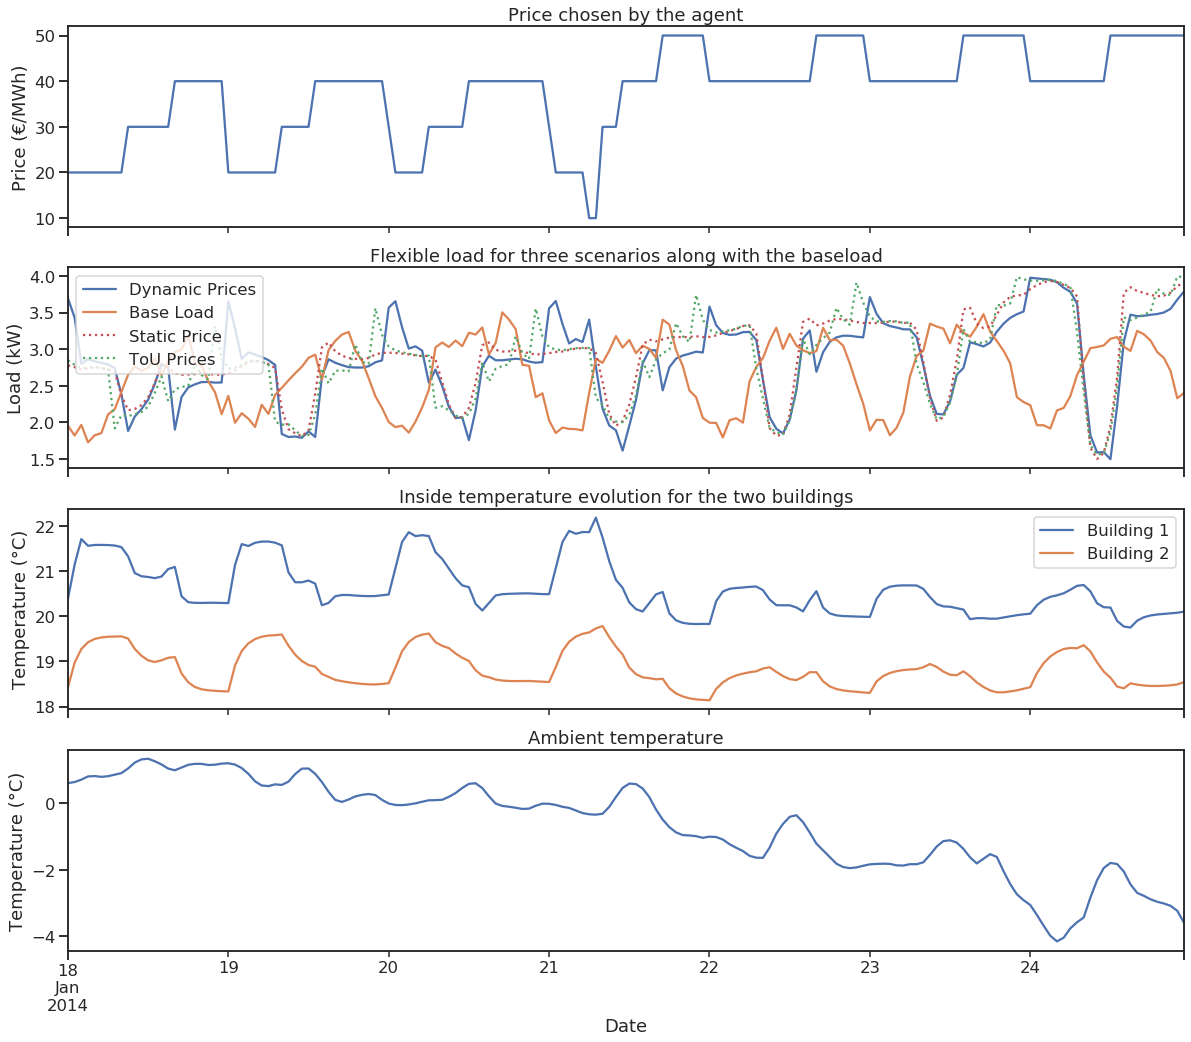

In [311]:
#sns.set('talk', palette='bright')
f, ax = plt.subplots(4,1,figsize=(20,17), sharex=True)
one_week['Chosen Price'].plot(ax=ax[0])
ax[0].set_ylabel('Price (€/MWh)')
ax[0].set_title('Price chosen by the agent')

one_week['Heating Load'].plot(ax=ax[1])
one_week['Base Loads'].plot(ax=ax[1])
data_base.iloc[17*24:24*24,:]['Heating Load 2'].plot(ax=ax[1],c='r', linestyle = 'dotted')
data_base_tou.iloc[17*24:24*24,:]['Heating Load 2'].plot(ax=ax[1],c='g', linestyle = 'dotted')
ax[1].legend(["Dynamic Prices", "Base Load", "Static Price", "ToU Prices"], loc='upper left')
ax[1].set_ylabel('Load (kW)')
ax[1].set_title('Flexible load for three scenarios along with the baseload')

one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2])
ax[2].legend(["Building 1", "Building 2"])
ax[2].set_ylabel('Temperature (°C)')
ax[2].set_title('Inside temperature evolution for the two buildings')

one_week['Ambient Temperatures'].plot(ax=ax[3])
ax[3].set_ylabel('Temperature (°C)')
ax[3].set_title('Ambient temperature')
plt.savefig('data/output/RLBuildings/two_buildings_zoom_eval.png',bbox_inches='tight')

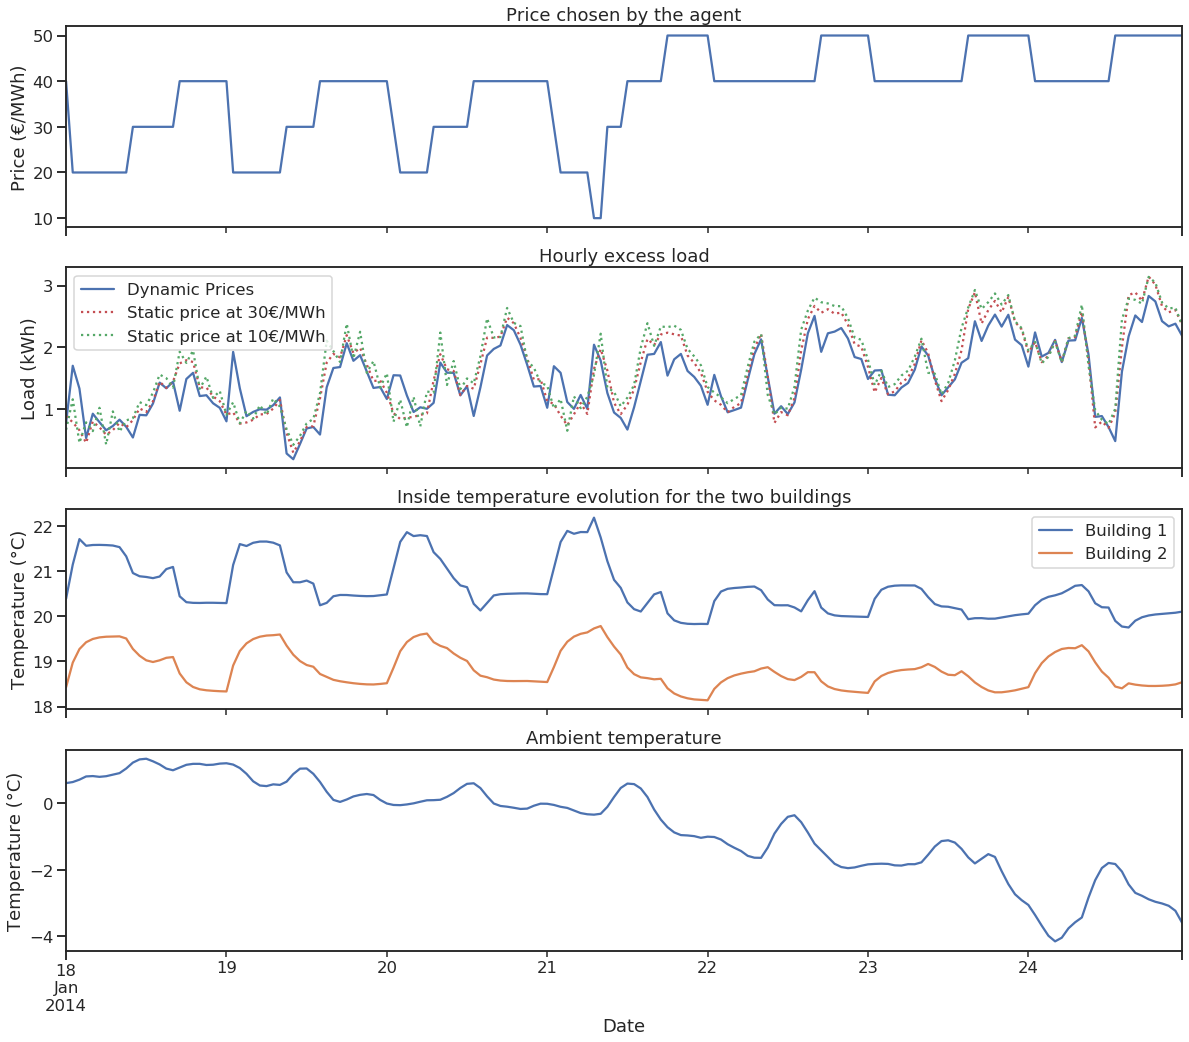

In [25]:
#sns.set('talk', palette='bright')
f, ax = plt.subplots(4,1,figsize=(20,17), sharex=True)
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Deviation from load limit'].plot(ax=ax[1])
ax[0].set_ylabel('Price (€/MWh)')
ax[0].set_title('Price chosen by the agent')

data_base.iloc[17*24:24*24,:]['Deviation from load limit'].plot(ax=ax[1],c='r', linestyle = 'dotted')
data_base_10.iloc[17*24:24*24,:]['Deviation from load limit'].plot(ax=ax[1],c='g', linestyle = 'dotted')
ax[1].legend(["Dynamic Prices", "Static price at 30€/MWh", "Static price at 10€/MWh"])
ax[1].set_ylabel('Load (kWh)')
ax[1].set_title('Hourly excess load')

one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2])
ax[2].legend(["Building 1", "Building 2"])
ax[2].set_ylabel('Temperature (°C)')
ax[2].set_title('Inside temperature evolution for the two buildings')

one_week['Ambient Temperatures'].plot(ax=ax[3])
ax[3].set_ylabel('Temperature (°C)')
ax[3].set_title('Ambient temperature')
#plt.savefig('data/output/RLBuildings/two_buildings_zoom_eval.png',bbox_inches='tight')

## Evaluation against baselines

### In terms of load

In [141]:
model_load = data['Heating Load'].sum()
static_price_load = data_base['Heating Load'].sum()
tou_load = data_base_tou['Heating Load'].sum()

In [142]:
model_load

1938.0147193525713

In [143]:
static_price_load

1963.1704235041416

In [144]:
tou_load

1919.9901701474469

### In terms of price

In [18]:
model_paid_price = data['Total Price'].sum()
static_paid_price = data_base['Total Price'].sum()
tou_paid_price = data_base_tou['Total Price'].sum()

In [19]:
model_paid_price

121.89369870730275

In [20]:
static_paid_price

115.63893820986051

In [21]:
tou_paid_price

142.234798271082

### In terms of temperature discomfort

In [22]:
data['Temperature Deviation 1'] = data['Inside Temperatures 1'].map(lambda x: np.maximum(0,19. -x))
data['Temperature Deviation 2'] = data['Inside Temperatures 2'].map(lambda x: np.maximum(0,19.5 - x))

In [23]:
data_base_tou['Temperature Deviation 1'] = data_base_tou['Inside Temperatures 1'].map(lambda x: np.maximum(0,19. -x))
data_base_tou['Temperature Deviation 2'] = data_base_tou['Inside Temperatures 2'].map(lambda x: np.maximum(0,19.5 - x))

In [24]:
data_base['Temperature Deviation 1'] = data_base['Inside Temperatures 1'].map(lambda x: np.maximum(0,19. -x))
data_base['Temperature Deviation 2'] = data_base['Inside Temperatures 2'].map(lambda x: np.maximum(0,19.5 - x))

# Graphs

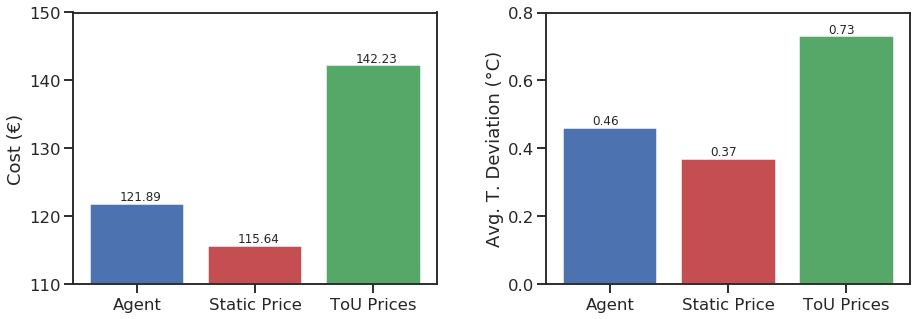

In [51]:
cost_labels_values = np.round(np.array([model_paid_price, static_paid_price, tou_paid_price]), decimals=2)
costs = cost_labels_values - 110
labels = ['Agent', 'Static Price', 'ToU Prices']


colors = sns.color_palette()
selected_colors = [colors[0], colors[3], colors[2]]

N=3
ind = np.arange(N)
f, axs = plt.subplots(1,2,figsize=(15,5), sharey=False)
axs[0].bar(ind, costs, bottom=110, color = selected_colors)
axs[0].set_ylabel('Cost (€)')
axs[0].set_yticks(np.arange(110,160, 10))
for i, v in enumerate(cost_labels_values):
    axs[0].text(i-0.15, 
              v+0.5, 
              v, 
              fontsize=12)
axs[0].set_xticks(ind)
axs[0].set_xticklabels(labels)

disutilities = np.round(np.array([data['Temperature Deviation 2'].mean(), data_base['Temperature Deviation 2'].mean(), data_base_tou['Temperature Deviation 2'].mean()]), decimals=2)



axs[1].bar(ind, disutilities, color = selected_colors)
for i, v in enumerate(disutilities):
    axs[1].text(i-0.15, 
              v+0.01, 
              v, 
              fontsize=12)
axs[1].set_yticks(np.arange(0,0.9, 0.2))
#axs[1].bar(ind ,static_price_disutility , color = colors[3], width = 0.25)
#axs[1].bar(ind + 0.25,tou_disutility , color = colors[2], width = 0.25)
#axs[1].legend(['Constant price at 30€/MWh', 'Constant price at 10€/MWh', 'Dynamic prices'])

axs[1].set_ylabel('Avg. T. Deviation (°C)')
axs[1].set_xticks(ind)
axs[1].set_xticklabels(labels)

plt.subplots_adjust(wspace = 0.3)

plt.savefig('data/output/RLBuildings/two_buildings_customers_eval.png',bbox_inches='tight')

In [205]:
sum(data_base['Above'])

898.1566305275743

In [206]:
data_base['Above'].mean()

1.2055793698356705

In [207]:
data_base['Date'] = pd.date_range(start='2014-01-01',end='2014-02-11-00:00:00', periods=len(data))
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()

In [208]:
data_base['Daily Excess']

0            NaN
1      10.624495
2      14.518929
3       8.924391
4       5.604652
         ...    
740          NaN
741          NaN
742          NaN
743          NaN
744          NaN
Name: Daily Excess, Length: 745, dtype: float64

In [28]:
data_base['Daily Excess'].dropna()

Series([], Name: Daily Excess, dtype: float64)

In [37]:
list(base_30_excess.values)

[12.049263921970233,
 14.59189196567636,
 9.082406382138387,
 5.559985329933703,
 6.749106983266017,
 14.649753577808934,
 5.784340071182257,
 5.733452237094336,
 11.113183869342478,
 10.747889226239451,
 9.538782694424597,
 16.849158940062683,
 38.14520483148541,
 19.88568756592261,
 22.053354670047334,
 30.05542207408009,
 29.278784090620654,
 25.407324411651487,
 28.364871616727633,
 37.13017419028773,
 36.37878554994157,
 41.40424624916815,
 46.41227520604849,
 50.14977778860933,
 51.73583057429066,
 58.75717613683168,
 56.13125652588146,
 40.254540532590944,
 57.97513766321427,
 56.595997898159894,
 49.591567752875704]

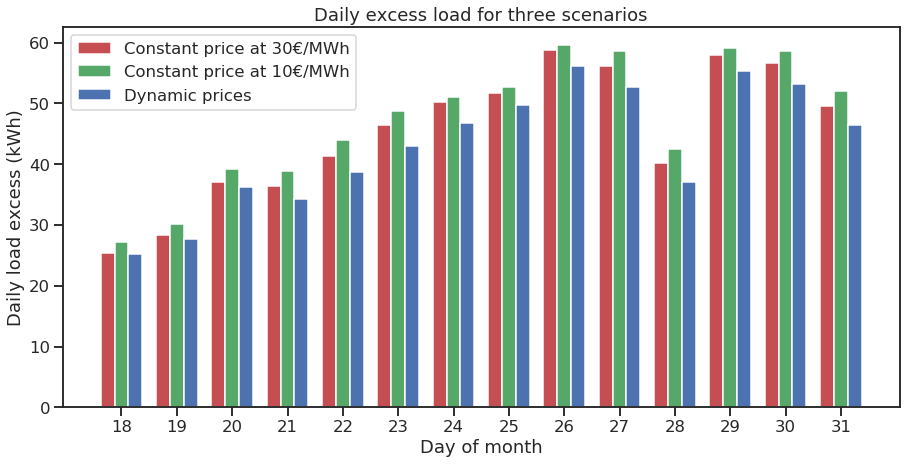

In [27]:
base_30_excess = data_base.groupby('Day')['Above'].sum().values[17:]
base_10_excess = data_base_10.groupby('Day')['Above'].sum().values[17:]
model_excess = data.groupby('Day')['Above'].sum().values[17:]

N=len(base_30_excess)
ind = np.arange(N) + 18
f, axs = plt.subplots(1,figsize=(15,7), sharey=False)
axs.bar(ind - 0.25, base_30_excess, color = 'r', width = 0.25)
axs.bar(ind ,base_10_excess , color = 'g', width = 0.25)
axs.bar(ind + 0.25,model_excess , color = 'b', width = 0.25)
axs.legend(['Constant price at 30€/MWh', 'Constant price at 10€/MWh', 'Dynamic prices'])
axs.set_ylabel('Daily load excess (kWh)')
axs.set_xlabel('Day of month')
axs.set_title('Daily excess load for three scenarios')
axs.set_yticks(np.arange(0, 70, 10))
#for i, v in enumerate(cost_labels_values):
#    axs[0].text(i-0.15, 
#              v+0.2, 
#              v, 
#              fontsize=12)
axs.set_xticks(ind)
#axs.set_xticklabels(labels)
plt.savefig('data/output/RLBuildings/load_eval_two_buildings.png',bbox_inches='tight')

# Policy evaluation

In [2]:
policy_data = pkl.load(open('data/output/RLBuildings/Lowerload/Multi_RL_Zeta0.1policy_eval.pkl', 'rb'))
policy_data

,Inside Temperatures 1,Inside Temperatures 2,Ambient Temperatures,Times,Loads,Actions
0,18.0,18.0,-5.0,0,0.0,3.0
1,18.0,18.0,-5.0,1,0.0,4.0
2,18.0,18.0,-5.0,2,0.0,4.0
3,18.0,18.0,-5.0,3,0.0,4.0
4,18.0,18.0,-5.0,4,0.0,4.0
...,...,...,...,...,...,...
8639995,21.8,21.8,4.8,19,3.4,3.0
8639996,21.8,21.8,4.8,20,3.4,3.0
8639997,21.8,21.8,4.8,21,3.4,3.0
8639998,21.8,21.8,4.8,22,3.4,3.0


In [3]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    #return x*50+10
    return PRICE_SET[int(x)]
policy_data['Chosen Price'] = policy_data['Actions'].map(lambda x: extract_price(x))

In [4]:
policy_data

,Inside Temperatures 1,Inside Temperatures 2,Ambient Temperatures,Times,Loads,Actions,Chosen Price
0,18.0,18.0,-5.0,0,0.0,3.0,40
1,18.0,18.0,-5.0,1,0.0,4.0,50
2,18.0,18.0,-5.0,2,0.0,4.0,50
3,18.0,18.0,-5.0,3,0.0,4.0,50
4,18.0,18.0,-5.0,4,0.0,4.0,50
...,...,...,...,...,...,...,...
8639995,21.8,21.8,4.8,19,3.4,3.0,40
8639996,21.8,21.8,4.8,20,3.4,3.0,40
8639997,21.8,21.8,4.8,21,3.4,3.0,40
8639998,21.8,21.8,4.8,22,3.4,3.0,40


In [12]:
policy_data.loc[(np.round(policy_data['Inside Temperatures 1'],1) == 20.) & (policy_data['Times'] == 11)]

,Inside Temperatures 1,Inside Temperatures 2,Ambient Temperatures,Times,Loads,Actions,Chosen Price
4320011,20.0,18.0,-5.0,11,0.0,4.0,50
4320035,20.0,18.0,-5.0,11,0.2,4.0,50
4320059,20.0,18.0,-5.0,11,0.4,4.0,50
4320083,20.0,18.0,-5.0,11,0.6,4.0,50
4320107,20.0,18.0,-5.0,11,0.8,4.0,50
...,...,...,...,...,...,...,...
4751891,20.0,21.8,4.8,11,2.6,0.0,10
4751915,20.0,21.8,4.8,11,2.8,0.0,10
4751939,20.0,21.8,4.8,11,3.0,0.0,10
4751963,20.0,21.8,4.8,11,3.2,0.0,10


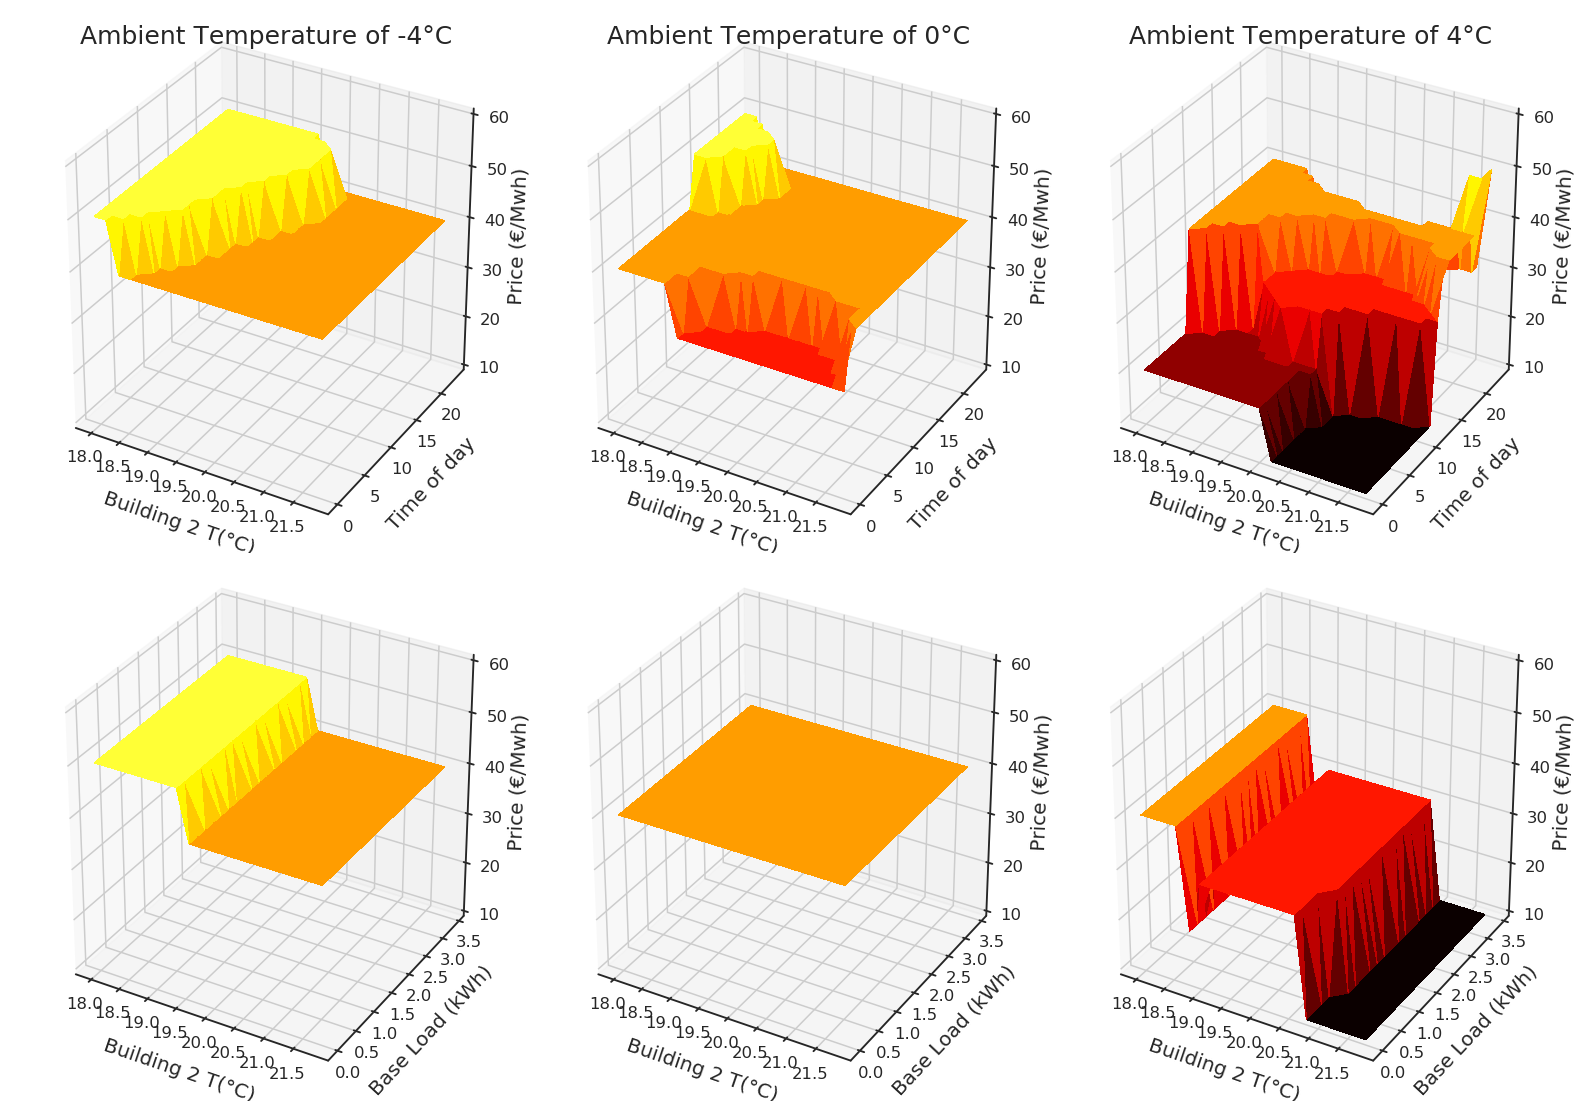

In [47]:
import numpy as np
fig = plt.figure(figsize=(28,20))

selected_temperatures = [-4, 0, 4]
selected_data = policy_data.loc[(np.round(policy_data['Inside Temperatures 1'],1) == 20.) & (policy_data['Loads'] == 2.0)]

for i in range(3):
    selected = selected_data.loc[(np.round(selected_data['Ambient Temperatures'],1) == selected_temperatures[i])] #  and 
    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    X = selected['Inside Temperatures 2']
    Y = selected['Times']
    Z = selected['Chosen Price']

    ax = fig.add_subplot(2, 3, i+1, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False, vmin=10, vmax=60)
    #ax.scatter(X,Y,Z)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    ax.set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]), fontsize=25)
    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
    ax.set_xlabel('Building 2 T(°C)', fontsize=20, labelpad=15)
    ax.set_ylabel('Time of day', fontsize=20, labelpad=15)
    ax.set_zlabel('Price (€/Mwh)', fontsize=20, labelpad=15)
    ax.set_zlim(10, 60)
    ax.tick_params(axis='z', which='major', pad=10)


selected_data = policy_data.loc[(np.round(policy_data['Inside Temperatures 1'],1) == 20.) & (policy_data['Times'] == 11)]

for i in range(3):
    selected = selected_data.loc[(np.round(selected_data['Ambient Temperatures'],1) == selected_temperatures[i])] #  and 
    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    X = selected['Inside Temperatures 2']
    Y = selected['Loads']
    Z = selected['Chosen Price']

    ax = fig.add_subplot(2, 3, i+4, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False, vmin=10, vmax=60)
    #ax.scatter(X,Y,Z)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    #ax.set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]), fontsize=25)
    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
    ax.set_xlabel('Building 2 T(°C)', fontsize=20, labelpad=15)
    ax.set_ylabel('Base Load (kWh)', fontsize=20, labelpad=15)
    ax.set_zlabel('Price (€/Mwh)', fontsize=20, labelpad=15)
    ax.set_zlim(10, 60)
    ax.tick_params(axis='z', which='major', pad=10)

    
plt.subplots_adjust(wspace=0.01, hspace = 0.01)
    
plt.savefig('data/output/RLbuildings/Lowerload/Zeta0.1_policy_eval_3D.png',bbox_inches='tight')

# Building Scale Up

In [82]:
data = pkl.load(open('data/output/RLBuildings/ScaledUp/0532640_dynamic_True_rewards_dqn.pkl', "rb"))
data[-1]

{'NUM_EPISODES': 4000,
 'EPSILON': 1,
 'EPS_DECAY': 0.99997,
 'LEARNING_RATE_': 0.001,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 1,
 'LOAD_PENALTY': 100,
 'PRICE_PENALTY': 0.1,
 'ZETA': 0.1}

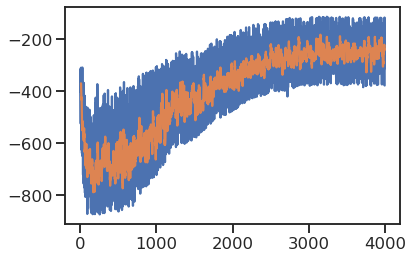

In [83]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

## Evaluation on January

In [52]:
data = pkl.load(open("data/output/RLBuildings/ScaledUp/Multi_10_Buildings_Zeta0.1_eval.pkl", "rb"))

data['Total Load'] = data['Total Load']*1000
#data['Base Loads 1'] = data['Base Loads 1']*1000
#data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads']*1000
data['Deviation from load limit'] = data['Total Load'] - 18
data['Date'] = pd.date_range(start='2014-01-01',end='2014-01-31-23:00:00', periods=len(data))
data['Day'] = data['Date'].dt.day
data.index = data['Date']
data['Above'] = (data['Total Load'] >= 18)*(data['Total Load']-18)
data['Heating Load'] = data['Total Load'] - data['Base Loads']
#data['Daily Excess'] = data.groupby('Day')['Above'].sum()

In [53]:
data['Total Price'].sum()

585.2208001781115

In [54]:
data

,Inside Temperatures 1,Inside Temperatures 2,Base Loads,Actions 1,Actions 2,Ambient Temperatures,Actions,Rewards,Total Load,Total Price,Deviation from load limit,Date,Day,Above,Heating Load
Date,,,,,,,,,,,,,,,
2014-01-01 00:00:00,21.083931,20.914993,9.502428,0.340819,0.357404,2.118,3.0,-16.257694,21.216956,0.424339,3.216956,2014-01-01 00:00:00,1,3.216956,11.714528
2014-01-01 01:00:00,20.257878,21.385934,10.111408,0.470809,0.466633,2.118,3.0,-16.247773,21.205957,0.424119,3.205957,2014-01-01 01:00:00,1,3.205957,11.094548
2014-01-01 02:00:00,19.854413,21.367247,9.080179,0.512637,0.494062,2.147,3.0,-15.687633,20.584959,0.411699,2.584959,2014-01-01 02:00:00,1,2.584959,11.504780
2014-01-01 03:00:00,19.586908,21.370987,9.293735,0.540088,0.529426,2.324,3.0,-16.167667,21.117147,0.422343,3.117147,2014-01-01 03:00:00,1,3.117147,11.823413
2014-01-01 04:00:00,19.477065,21.360881,8.549282,0.540896,0.542690,2.344,3.0,-15.631545,20.522777,0.410456,2.522777,2014-01-01 04:00:00,1,2.522777,11.973495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31 19:00:00,18.279011,19.714442,14.888791,0.787310,0.800834,-2.514,10.0,-29.142541,31.383318,1.726083,13.383318,2014-01-31 19:00:00,31,13.383318,16.494527
2014-01-31 20:00:00,18.207154,19.677299,13.642735,0.999876,0.999859,-2.605,0.0,-31.378010,33.641068,0.168205,15.641068,2014-01-31 20:00:00,31,15.641068,19.998334
2014-01-31 21:00:00,18.714151,19.990115,13.111658,0.996074,0.996139,-2.735,5.0,-28.406891,33.064948,0.991948,15.064948,2014-01-31 21:00:00,31,15.064948,19.953290


In [55]:
PRICE_SET =  [5,10,15,20,25,30,35,40,45,50,55,60]##[i for i in range(61)]#[5,10,15,20,25,30,35,40,45,50,55,60] #[10,20,30,40,50,60]
def extract_price(x):
    return PRICE_SET[int(x)]
    #return x*60
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [56]:
data_base = pkl.load(open('data/output/RLBuildings/ScaledUp/Multi_10_Buildings_Zeta0.130base_eval.pkl', "rb"))

In [57]:
data_base_10 = pkl.load(open('data/output/RLBuildings/ScaledUp/Multi_10_Buildings_Zeta0.15_base_eval.pkl', "rb")) #data/output/RLBuildings/ScaledUp/0532640_base_eval.pkl

In [58]:
data_base_tou = pkl.load(open('data/output/RLBuildings/ScaledUp/Multi_10_Buildings_Zeta0.1_ToU_base_eval.pkl', "rb"))

In [59]:
data_base['Total Load'] = data_base['Total Load']*1000
#data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
#data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads']*1000
data_base['Above'] = (data_base['Total Load'] >= 18)*(data_base['Total Load']-18)
data_base['Deviation from load limit'] = data_base['Total Load']-18
data_base['Date'] = pd.date_range(start='2014-01-01',end='2014-01-31-23:00:00', periods=len(data))
data_base.index = data_base['Date']
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()
data_base['Heating Load'] = data_base['Total Load'] - data_base['Base Loads']

In [325]:
data_base_10['Total Load'] = data_base_10['Total Load']*1000
#data_base_10['Base Loads 1'] = data_base_10['Base Loads 1']*1000
#data_base_10['Base Loads 2'] = data_base_10['Base Loads 2']*1000
data_base_10['Base Loads'] = data_base_10['Base Loads']*1000
data_base_10['Above'] = (data_base_10['Total Load'] >= 18)*(data_base_10['Total Load']-18)
data_base_10['Deviation from load limit'] = data_base_10['Total Load']-18
data_base_10['Date'] = pd.date_range(start='2014-01-01',end='2014-01-31-23:00:00', periods=len(data))
data_base_10.index = data_base_10['Date']
data_base_10['Day'] = data_base_10['Date'].dt.day
data_base_10['Heating Load'] = data_base_10['Total Load'] - data_base_10['Base Loads']

ValueError: Length of values does not match length of index

In [60]:
data_base_tou['Total Load'] = data_base_tou['Total Load']*1000
#data_base_tou['Base Loads 1'] = data_base_tou['Base Loads 1']*1000
#data_base_tou['Base Loads 2'] = data_base_tou['Base Loads 2']*1000
data_base_tou['Base Loads'] = data_base_tou['Base Loads']*1000
#data_base_tou['Above'] = (data_base_10['Total Load'] >= 18)*(data_base_10['Total Load']-18)
#data_base_tou['Deviation from load limit'] = data_base_10['Total Load']-18
data_base_tou['Date'] = pd.date_range(start='2014-01-01',end='2014-01-31-23:00:00', periods=len(data))
data_base_tou.index = data_base_tou['Date']
data_base_tou['Day'] = data_base_tou['Date'].dt.day
data_base_tou['Heating Load'] = data_base_tou['Total Load'] - data_base_tou['Base Loads']

In [338]:
data_base_tou

,Inside Temperatures 1,Inside Temperatures 2,Base Loads,Actions 1,Actions 2,Ambient Temperatures,Rewards,Total Load,Total Price,Prices,Date,Day,Heating Load
Date,,,,,,,,,,,,,
2014-01-01 00:00:00,21.083932,20.914993,9.502428,0.261409,0.285401,2.118,-14.212339,18.928393,0.567852,30,2014-01-01 00:00:00,1,9.425965
2014-01-01 01:00:00,20.054942,20.982931,10.111408,0.436204,0.429132,2.118,-16.009106,20.918168,0.627545,30,2014-01-01 01:00:00,1,10.806760
2014-01-01 02:00:00,19.573431,21.021380,9.080179,0.494927,0.475805,2.147,-15.592056,20.456318,0.613690,30,2014-01-01 02:00:00,1,11.376139
2014-01-01 03:00:00,19.285296,21.068780,9.293735,0.521788,0.509654,2.324,-15.954465,20.857658,0.625730,30,2014-01-01 03:00:00,1,11.563923
2014-01-01 04:00:00,19.154163,21.066057,8.549282,0.527367,0.528315,2.344,-15.446970,20.295647,0.608869,30,2014-01-01 04:00:00,1,11.746366
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31 19:00:00,18.733948,20.379701,14.888791,0.878680,0.910361,-2.514,-28.716600,33.480466,1.339219,40,2014-01-31 19:00:00,31,18.591676
2014-01-31 20:00:00,18.836348,20.563268,13.642735,0.884569,0.870974,-2.605,-26.850853,31.982959,1.279318,40,2014-01-31 20:00:00,31,18.340224
2014-01-31 21:00:00,18.990625,20.698537,13.111658,0.857911,0.855928,-2.735,-25.199319,31.001895,1.240076,40,2014-01-31 21:00:00,31,17.890238


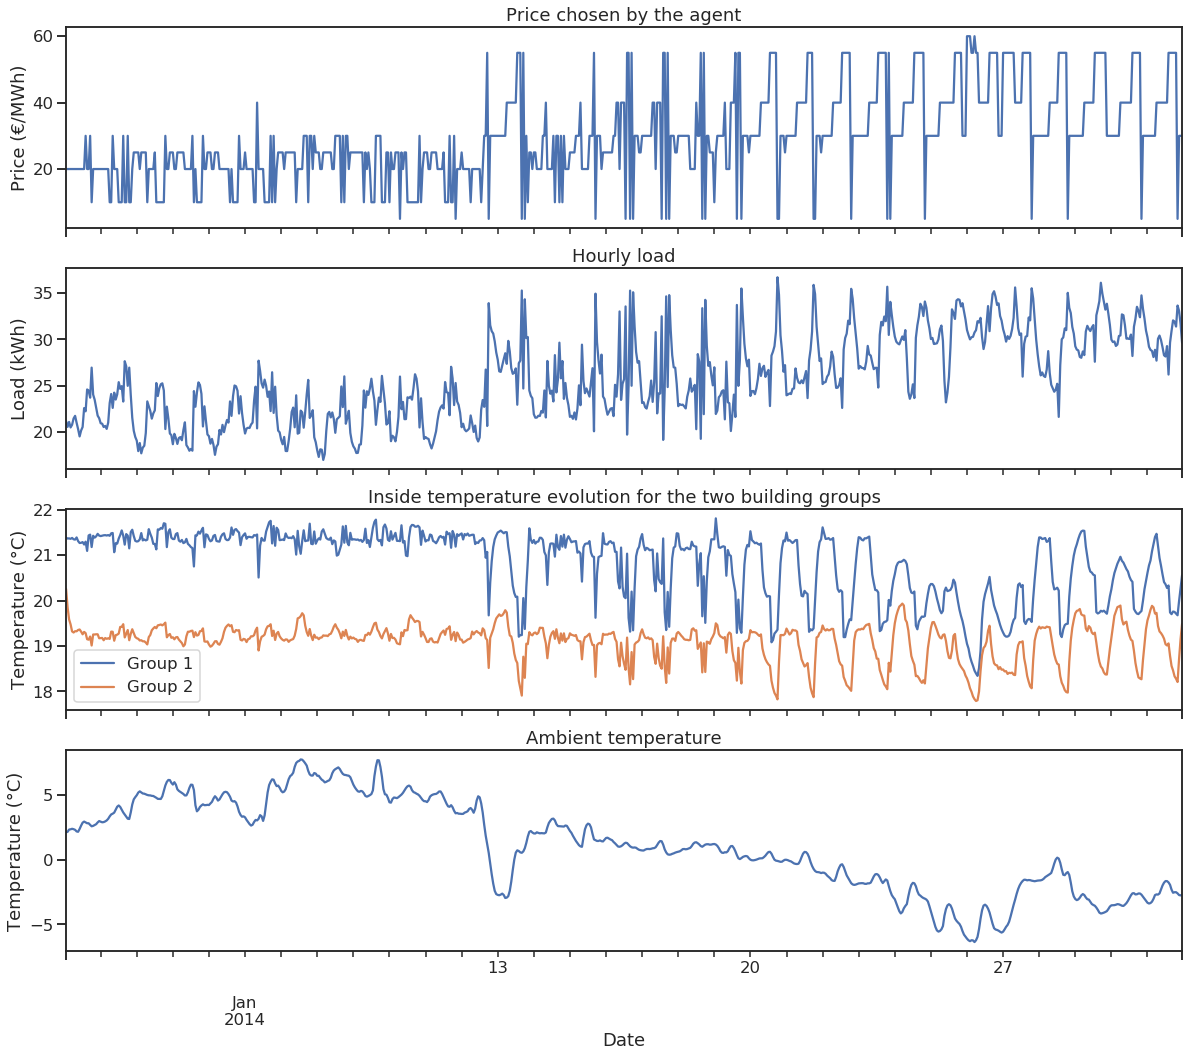

In [346]:
one_week = data.iloc[1:,:]
#sns.set('talk', palette='bright')
f, ax = plt.subplots(4,1,figsize=(20,17), sharex=True)
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Total Load'].plot(ax=ax[1])
#
ax[0].set_ylabel('Price (€/MWh)')
ax[0].set_title('Price chosen by the agent')

#data_base.iloc[1:,:]['Deviation from load limit'].plot(ax=ax[1],c='r', linestyle = 'dotted')
#data_base_10.iloc[1:,:]['Deviation from load limit'].plot(ax=ax[1],c='g', linestyle = 'dotted')
#ax[1].legend(["Dynamic Prices", "Static price at 30€/MWh", "Static price at 10€/MWh"])
ax[1].set_ylabel('Load (kWh)')
ax[1].set_title('Hourly load')

one_week['Inside Temperatures 2'].plot(ax=ax[2])
one_week['Inside Temperatures 1'].plot(ax=ax[2])
ax[2].legend(["Group 1", "Group 2"])
ax[2].set_ylabel('Temperature (°C)')
ax[2].set_title('Inside temperature evolution for the two building groups')

one_week['Ambient Temperatures'].plot(ax=ax[3])
ax[3].set_ylabel('Temperature (°C)')
ax[3].set_title('Ambient temperature')
plt.savefig('data/output/RLBuildings/ten_buildings_eval.png',bbox_inches='tight')

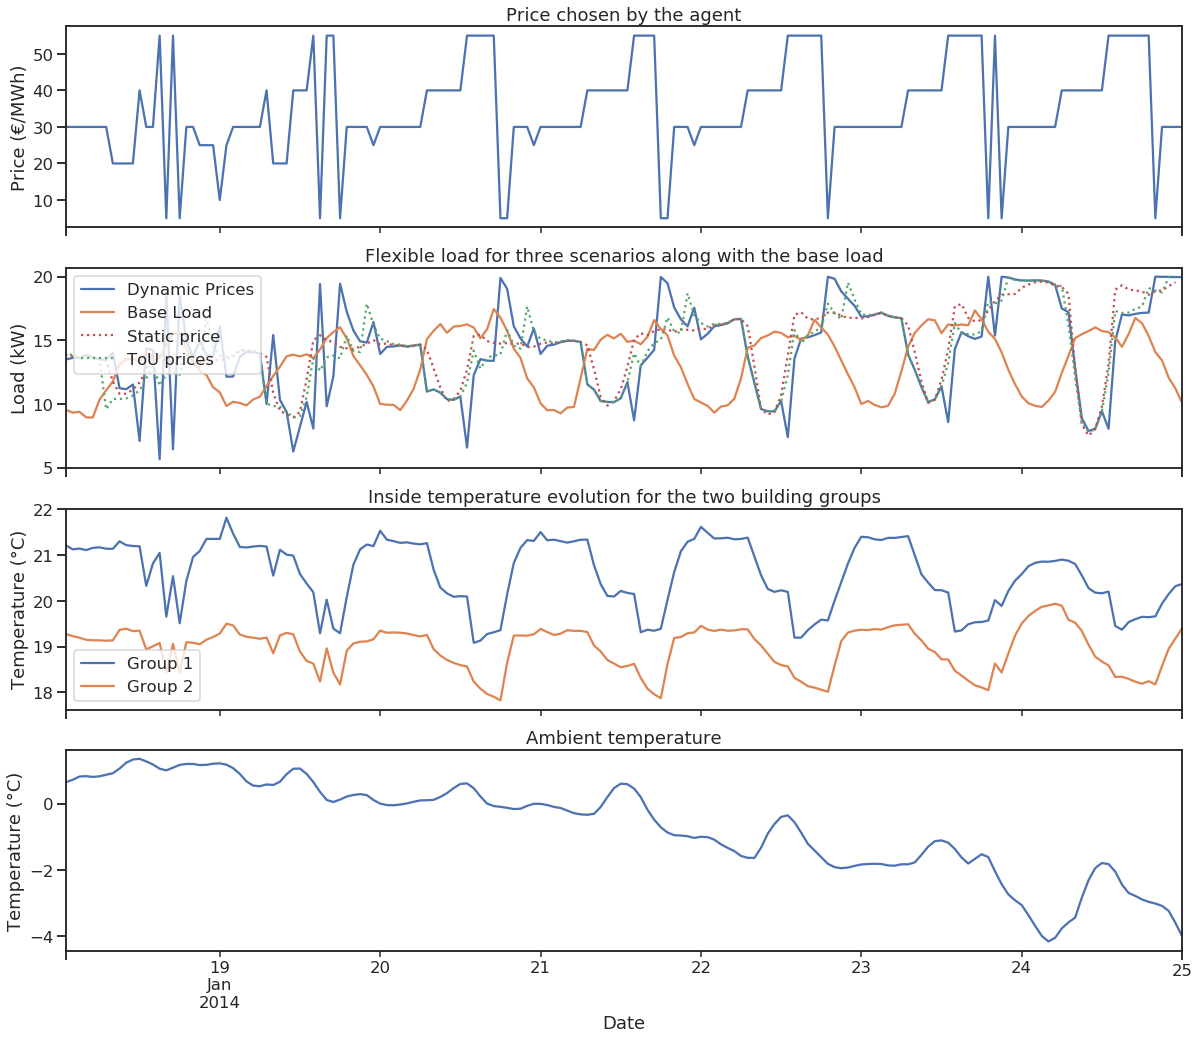

In [347]:
one_week = data.iloc[17*24+1:24*24+1,:]
#sns.set('talk', palette='bright')
f, ax = plt.subplots(4,1,figsize=(20,17), sharex=True)
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Heating Load'].plot(ax=ax[1])
one_week['Base Loads'].plot(ax=ax[1])
ax[0].set_ylabel('Price (€/MWh)')
ax[0].set_title('Price chosen by the agent')

data_base.iloc[17*24:24*24,:]['Heating Load'].plot(ax=ax[1], c='r', linestyle = 'dotted')
#data_base_10.iloc[23*24:25*24,:]['Heating Load'].plot(ax=ax[1], linestyle = 'dotted')
data_base_tou.iloc[17*24:24*24,:]['Heating Load'].plot(ax=ax[1],c='g', linestyle = 'dotted')
ax[1].legend(["Dynamic Prices", "Base Load" ,"Static price","ToU prices"], loc='upper left')
ax[1].set_ylabel('Load (kW)')
ax[1].set_title('Flexible load for three scenarios along with the base load')


one_week['Inside Temperatures 2'].plot(ax=ax[2])
one_week['Inside Temperatures 1'].plot(ax=ax[2])
ax[2].legend(["Group 1", "Group 2"])
ax[2].set_ylabel('Temperature (°C)')
ax[2].set_title('Inside temperature evolution for the two building groups')

one_week['Ambient Temperatures'].plot(ax=ax[3])
ax[3].set_ylabel('Temperature (°C)')
ax[3].set_title('Ambient temperature')
plt.savefig('data/output/RLBuildings/ten_buildings_eval_zoom.png',bbox_inches='tight')

# Evaluation against baselines

### In terms of paid price

In [61]:
model_paid_price = data['Total Price'].sum()
static_paid_price = data_base['Total Price'].sum()
tou_paid_price = data_base_tou['Total Price'].sum()

In [71]:
model_paid_price

585.2208001781115

In [72]:
static_paid_price

578.2823180053282

### In terms of load

In [62]:
model_load = data['Total Load'].sum()
static_price_load = data_base['Total Load'].sum()
tou_load = data_base_tou['Total Load'].sum()

### In terms of temperature discomfort

In [63]:
data.iloc[0,0] = 21.0839
data.iloc[0,1] = 20.9150

In [64]:
data['Temperature Deviation 1'] = data['Inside Temperatures 1'].map(lambda x: np.maximum(0,19. -x))
data['Temperature Deviation 2'] = data['Inside Temperatures 2'].map(lambda x: np.maximum(0,19.5 - x))

In [65]:
data['Temperature Deviation 1'].mean()

0.1289445312880891

In [66]:
data_base_tou

,Inside Temperatures 1,Inside Temperatures 2,Base Loads,Actions 1,Actions 2,Ambient Temperatures,Rewards,Total Load,Total Price,Prices,Date,Day,Heating Load
Date,,,,,,,,,,,,,
2014-01-01 00:00:00,21.083932,20.914993,9.502428,0.261409,0.285401,2.118,-14.212339,18.928393,0.567852,30,2014-01-01 00:00:00,1,9.425965
2014-01-01 01:00:00,20.054942,20.982931,10.111408,0.436204,0.429132,2.118,-16.009106,20.918168,0.627545,30,2014-01-01 01:00:00,1,10.806760
2014-01-01 02:00:00,19.573431,21.021380,9.080179,0.494927,0.475805,2.147,-15.592056,20.456318,0.613690,30,2014-01-01 02:00:00,1,11.376139
2014-01-01 03:00:00,19.285296,21.068780,9.293735,0.521788,0.509654,2.324,-15.954465,20.857658,0.625730,30,2014-01-01 03:00:00,1,11.563923
2014-01-01 04:00:00,19.154163,21.066057,8.549282,0.527367,0.528315,2.344,-15.446970,20.295647,0.608869,30,2014-01-01 04:00:00,1,11.746366
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31 19:00:00,18.733948,20.379701,14.888791,0.878680,0.910361,-2.514,-28.716600,33.480466,1.339219,40,2014-01-31 19:00:00,31,18.591676
2014-01-31 20:00:00,18.836348,20.563268,13.642735,0.884569,0.870974,-2.605,-26.850853,31.982959,1.279318,40,2014-01-31 20:00:00,31,18.340224
2014-01-31 21:00:00,18.990625,20.698537,13.111658,0.857911,0.855928,-2.735,-25.199319,31.001895,1.240076,40,2014-01-31 21:00:00,31,17.890238


In [67]:
data_base_tou['Temperature Deviation 1'] = data_base_tou['Inside Temperatures 1'].map(lambda x: np.maximum(0,19. -x))
data_base_tou['Temperature Deviation 2'] = data_base_tou['Inside Temperatures 2'].map(lambda x: np.maximum(0,19.5 - x))

In [68]:
data_base_tou['Temperature Deviation 1'].mean()

0.3108739761862909

In [69]:
data_base['Temperature Deviation 1'] = data_base['Inside Temperatures 1'].map(lambda x: np.maximum(0,19. -x))
data_base['Temperature Deviation 2'] = data_base['Inside Temperatures 2'].map(lambda x: np.maximum(0,19.5 - x))

In [70]:
data_base['Temperature Deviation 1'].mean()

0.05374209437642568

### Graphs

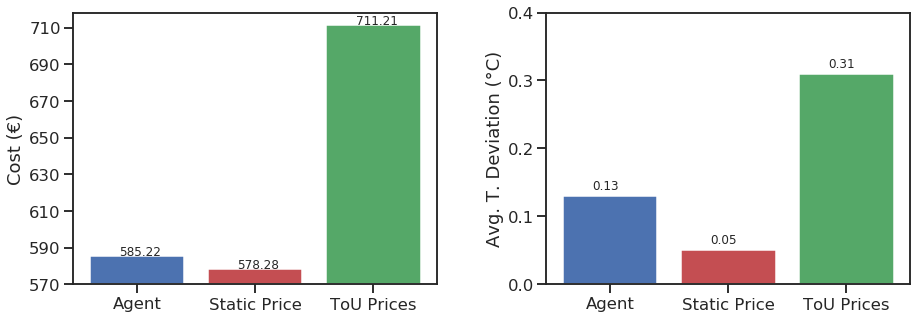

In [79]:
cost_labels_values = np.round(np.array([model_paid_price, static_paid_price, tou_paid_price]), decimals=2)
costs = cost_labels_values - 570
labels = ['Agent', 'Static Price', 'ToU Prices']


colors = sns.color_palette()
selected_colors = [colors[0], colors[3], colors[2]]

N=3
ind = np.arange(N)
f, axs = plt.subplots(1,2,figsize=(15,5), sharey=False)
axs[0].bar(ind, costs, bottom=570, color = selected_colors)
axs[0].set_ylabel('Cost (€)')
axs[0].set_yticks(np.arange(570,730, 20))
for i, v in enumerate(cost_labels_values):
    axs[0].text(i-0.15, 
              v+0.5, 
              v, 
              fontsize=12)
axs[0].set_xticks(ind)
axs[0].set_xticklabels(labels)

disutilities = np.round(np.array([data['Temperature Deviation 1'].mean(), data_base['Temperature Deviation 1'].mean(), data_base_tou['Temperature Deviation 1'].mean()]), decimals=2)



axs[1].bar(ind, disutilities, color = selected_colors)
for i, v in enumerate(disutilities):
    axs[1].text(i-0.15, 
              v+0.01, 
              v, 
              fontsize=12)
axs[1].set_yticks(np.arange(0,0.5, 0.1))
#axs[1].bar(ind ,static_price_disutility , color = colors[3], width = 0.25)
#axs[1].bar(ind + 0.25,tou_disutility , color = colors[2], width = 0.25)
#axs[1].legend(['Constant price at 30€/MWh', 'Constant price at 10€/MWh', 'Dynamic prices'])

axs[1].set_ylabel('Avg. T. Deviation (°C)')
axs[1].set_xticks(ind)
axs[1].set_xticklabels(labels)

plt.subplots_adjust(wspace = 0.3)

plt.savefig('data/output/RLBuildings/ten_buildings_customers_eval.png',bbox_inches='tight')

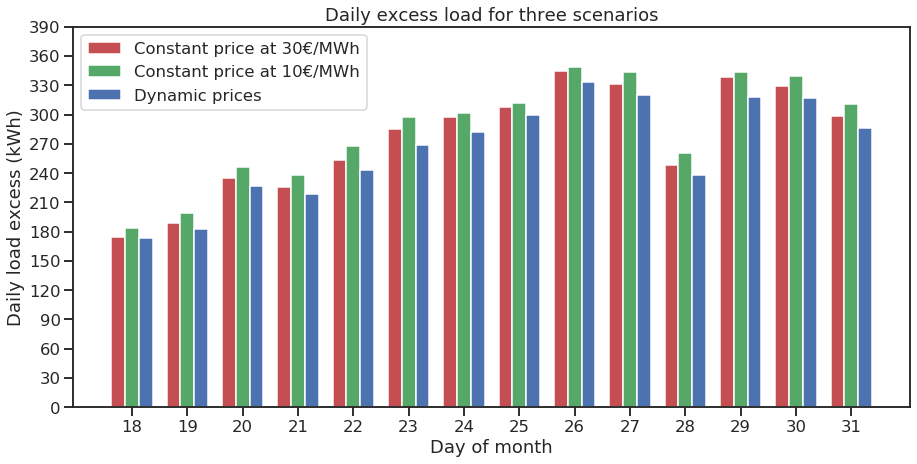

In [16]:
base_30_excess = data_base.groupby('Day')['Above'].sum().values[17:]
base_10_excess = data_base_10.groupby('Day')['Above'].sum().values[17:]
model_excess = data.groupby('Day')['Above'].sum().values[17:]

N=len(model_excess)
ind = np.arange(N)+18
f, axs = plt.subplots(1,figsize=(15,7), sharey=False)
axs.bar(ind - 0.25, base_30_excess, color = 'r', width = 0.25)
axs.bar(ind ,base_10_excess , color = 'g', width = 0.25)
axs.bar(ind + 0.25,model_excess , color = 'b', width = 0.25)
axs.legend(['Constant price at 30€/MWh', 'Constant price at 10€/MWh', 'Dynamic prices'])
axs.set_ylabel('Daily load excess (kWh)')
axs.set_xlabel('Day of month')
axs.set_yticks(np.arange(0, 420, 30))
axs.set_title('Daily excess load for three scenarios')
#for i, v in enumerate(cost_labels_values):
#    axs[0].text(i-0.15, 
#              v+0.2, 
#              v, 
#              fontsize=12)
axs.set_xticks(ind)
#axs.set_xticklabels(labels)
plt.savefig('data/output/RLBuildings/ten_buildings_load_eval.png',bbox_inches='tight')

# Policy evaluation

In [52]:
policy_data = pkl.load(open('data/output/RLBuildings/ScaledUp/Multi_RL_Zeta0.1_Scaled_policy_eval.pkl', 'rb'))
policy_data

,Inside Temperatures 1,Inside Temperatures 2,Ambient Temperatures,Times,Loads,Actions
0,18.0,18.0,-5.0,0,0.0,3.0
1,18.0,18.0,-5.0,1,0.0,3.0
2,18.0,18.0,-5.0,2,0.0,3.0
3,18.0,18.0,-5.0,3,0.0,3.0
4,18.0,18.0,-5.0,4,0.0,3.0
...,...,...,...,...,...,...
28799995,21.8,21.8,4.8,19,29.5,10.0
28799996,21.8,21.8,4.8,20,29.5,7.0
28799997,21.8,21.8,4.8,21,29.5,7.0
28799998,21.8,21.8,4.8,22,29.5,7.0


In [53]:
policy_data['Actions'].unique()

array([ 3.,  0.,  5.,  7., 10.,  9., 11.,  1.,  4.,  6.])

In [54]:
PRICE_SET = [5,10,15,20,25,30,35,40,45,50,55,60]
def extract_price(x):
    #return x*50+10
    return PRICE_SET[int(x)]
policy_data['Chosen Price'] = policy_data['Actions'].map(lambda x: extract_price(x))

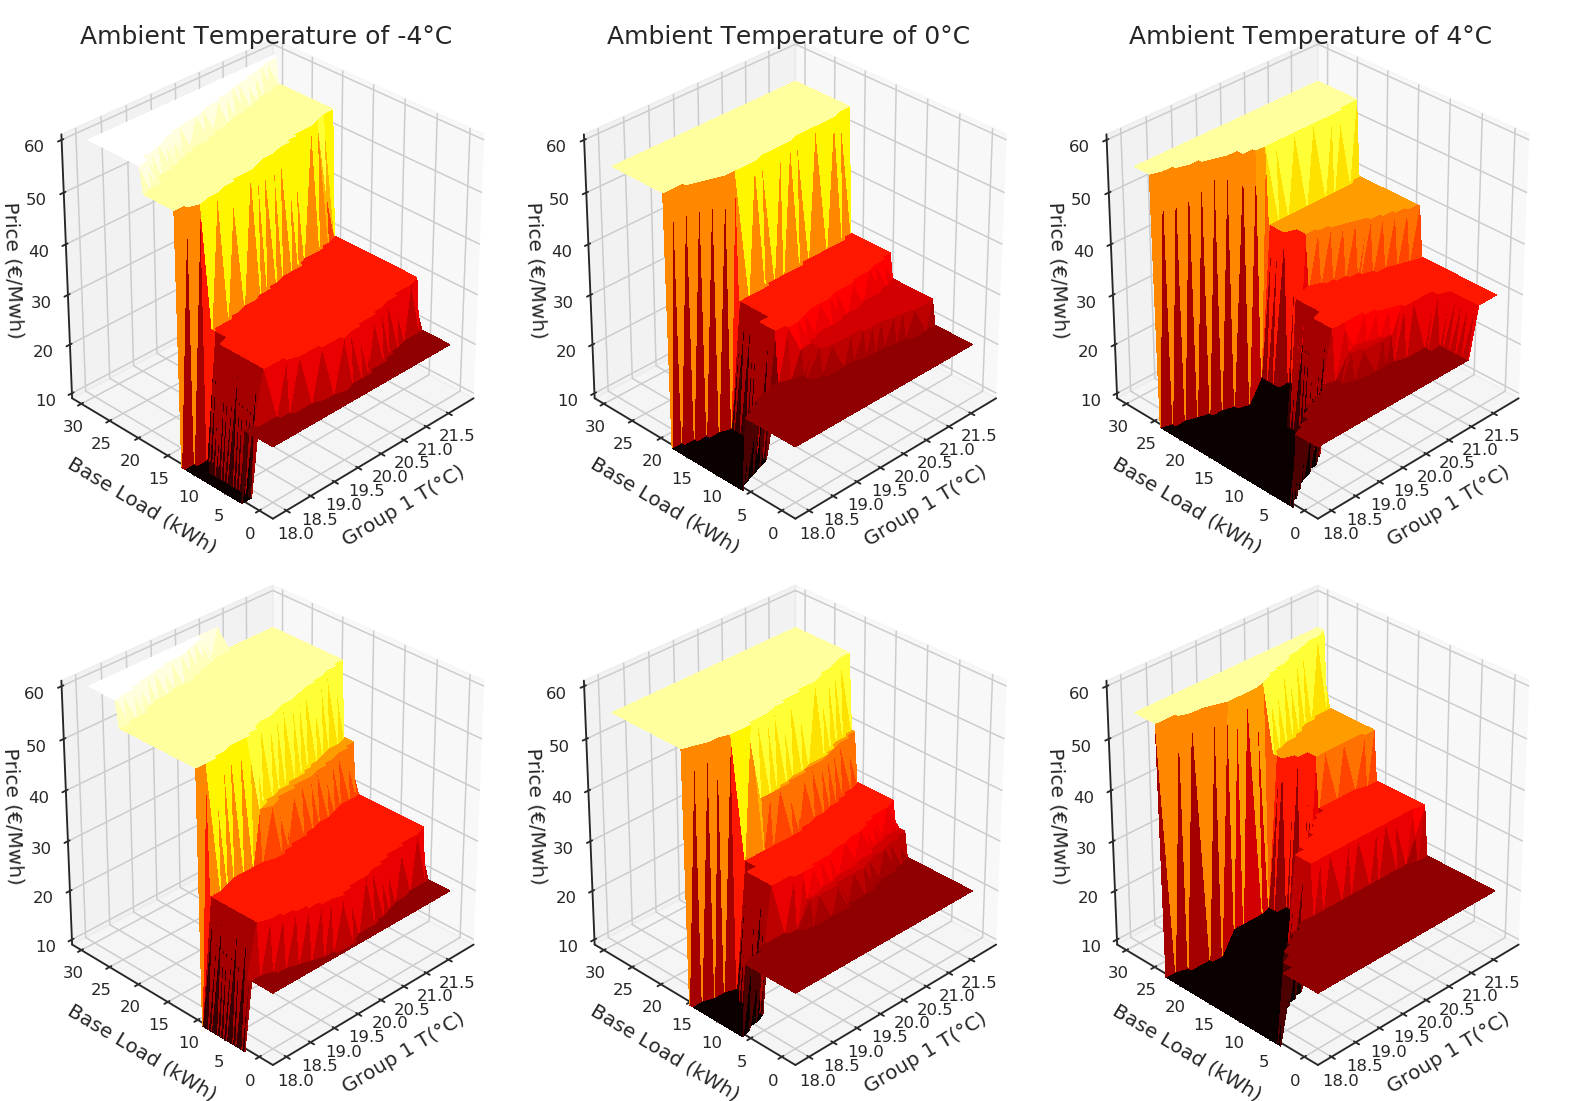

In [95]:
import numpy as np
fig = plt.figure(figsize=(28,20))
time = 20
selected_temperatures = [-4, 0, 4]
selected_data = policy_data.loc[(np.round(policy_data['Inside Temperatures 2'],1) == 18.) & (policy_data['Times'] == time)]

for i in range(3):
    selected = selected_data.loc[(np.round(selected_data['Ambient Temperatures'],1) == selected_temperatures[i])] #  and 
    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    X = selected['Inside Temperatures 1']
    Y = selected['Loads']
    Z = selected['Chosen Price']

    ax = fig.add_subplot(2, 3, i+1, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False, vmin=10, vmax=60)
    #ax.scatter(X,Y,Z)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    ax.set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]), fontsize=25)
    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
    ax.set_xlabel('Group 1 T(°C)', fontsize=20, labelpad=15)
    ax.set_ylabel('Base Load (kWh)', fontsize=20, labelpad=15)
    ax.set_zlabel('Price (€/Mwh)', fontsize=20, labelpad=15)
    ax.set_zlim(10, 60)
    ax.tick_params(axis='z', which='major', pad=10)
    ax.view_init(elev=30., azim=225)

    
plt.subplots_adjust(wspace=0.01, hspace = 0.01)


selected_data = policy_data.loc[(np.round(policy_data['Inside Temperatures 2'],1) == 21.) & (policy_data['Times'] == time)]

for i in range(3):
    selected = selected_data.loc[(np.round(selected_data['Ambient Temperatures'],1) == selected_temperatures[i])] #  and 
    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    X = selected['Inside Temperatures 1']
    Y = selected['Loads']
    Z = selected['Chosen Price']

    ax = fig.add_subplot(2, 3, i+4, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False, vmin=10, vmax=60)
    #ax.scatter(X,Y,Z)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    #ax.set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]), fontsize=25)
    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
    ax.set_xlabel('Group 1 T(°C)', fontsize=20, labelpad=15)
    ax.set_ylabel('Base Load (kWh)', fontsize=20, labelpad=15)
    ax.set_zlabel('Price (€/Mwh)', fontsize=20, labelpad=15)
    ax.set_zlim(10, 60)
    ax.tick_params(axis='z', which='major', pad=10)
    ax.view_init(elev=30., azim=225)

    
plt.subplots_adjust(wspace=0.01, hspace = 0.01)

#selected_data = policy_data.loc[(np.round(policy_data['Inside Temperatures 1'],1) == 21.) & (policy_data['Times'] == 12)]
#
#for i in range(3):
#    selected = selected_data.loc[(np.round(selected_data['Ambient Temperatures'],1) == selected_temperatures[i])] #  and 
#    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
#    X = selected['Inside Temperatures 2']
#    Y = selected['Loads']
#    Z = selected['Chosen Price']
#
#    ax = fig.add_subplot(3, 3, i+7, projection='3d')
#
#    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
#                       linewidth=0, antialiased=False, vmin=10, vmax=60)
#    #ax.scatter(X,Y,Z)
#    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
#    #ax.set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]), fontsize=25)
#    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
#    ax.set_xlabel('Building 2 T(°C)', fontsize=20, labelpad=15)
#    ax.set_ylabel('Base Load (kWh)', fontsize=20, labelpad=15)
#    ax.set_zlabel('Price (€/Mwh)', fontsize=20, labelpad=15)
#    ax.set_zlim(10, 60)
#    ax.tick_params(axis='z', which='major', pad=10)
#
#    
#plt.subplots_adjust(wspace=0.01, hspace = 0.01)
    
plt.savefig('data/output/RLbuildings/ScaledUp/Zeta0.1_scale_up_policy_eval_3D.png',bbox_inches='tight')